In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For Compouding Interest

In [21]:
returns+1

,X,Y
0,NaN,NaN
1,1.119048,2.255338
2,1.051064,0.602367
3,1.270445,1.092993


In [24]:
np.prod(returns+1)-1

X    0.494286
Y    0.484875
dtype: float64

OR

In [23]:
(returns+1).prod()-1

X    0.494286
Y    0.484875
dtype: float64

For Getting the Pct upto rounded by 2

In [25]:
(((returns+1).prod()-1)*100).round(2)

X    49.43
Y    48.49
dtype: float64

In [26]:
returns

,X,Y
0,NaN,NaN
1,0.119048,1.255338
2,0.051064,-0.397633
3,0.270445,0.092993


# Working For small and Large 10% data

In [2]:
stocks_data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                         header = 0, index_col = 0, parse_dates=True, na_values = -99.99)

In [3]:
stocks_data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [4]:
columns = ["Lo 10","Hi 10"]
stocks_data = stocks_data[columns]

In [5]:
stocks_data.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [6]:
stocks_data = stocks_data/100
stocks_data.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [7]:
stocks_data.columns = ["Small Cap","Large Cap"]

In [8]:
stocks_data.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


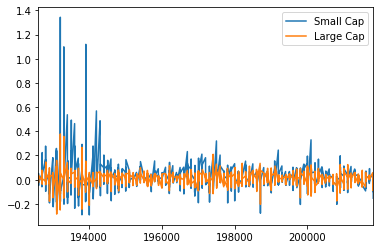

In [9]:
stocks_data.plot.line()
plt.show()

In [10]:
stocks_data.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

In [15]:
annualized_vol = stocks_data.std()*np.sqrt(12)
annualized_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

## return after Every month

In [20]:
no_months = stocks_data.shape[0]
returns_per_month = (stocks_data+1).prod()**(1/no_months)-1
returns_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

## Return After a Year

In [21]:
annualised_return = (stocks_data+1).prod()**(12/no_months)-1
annualised_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

OR

In [23]:
annualised_return = (returns_per_month+1)**12-1
annualised_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

## Return & Risk Ratio = (Annual Return/Volatility)

In [24]:
annualised_return/annualized_vol

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

## Sharp ratio: (Annual return-Riskfree rate)/Annual volatility

In [27]:
riskfree_rate = 0.03
excess_return = annualised_return-riskfree_rate
sharp_ratio = excess_return/annualized_vol
sharp_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

# Now lets see the analysis for Top and Bottom 20% Company

In [36]:
stocks_data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                         header = 0, index_col = 0, parse_dates=True, na_values = -99.99)

In [37]:
columns = ["Lo 20","Hi 20"]
data = stocks_data[columns]

In [39]:
data.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [40]:
data.columns = ["Small 20","Large 20"]
data.head()

,Small 20,Large 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [41]:
data = data/100

In [42]:
data.head()

,Small 20,Large 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [50]:
annualised_vol = (data.std()*np.sqrt(12))-1
annualised_vol

Small 20   -0.663299
Large 20   -0.804884
dtype: float64

In [51]:
n_month = data.shape[0]
return_per_month = (data+1).prod()**(1/n_month)-1
return_per_month

Small 20    0.011860
Large 20    0.007859
dtype: float64

In [52]:
annual_return = (return_per_month+1)**12-1
annual_return

Small 20    0.151977
Large 20    0.098490
dtype: float64

## Risk to Volatility ratio

In [53]:
annual_return/annualised_vol

Small 20   -0.229123
Large 20   -0.122366
dtype: float64

In [54]:
riskfree_rate = 0.03
excess_return = annual_return-riskfree_rate
sharp_ratio = excess_return/annualized_vol
sharp_ratio

Hi 20      NaN
Large 20   NaN
Lo 20      NaN
Small 20   NaN
dtype: float64

In [55]:
excess_return

Small 20    0.121977
Large 20    0.068490
dtype: float64

# Compute Drawdown

In [31]:
max_draw = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                         header = 0, index_col = 0, parse_dates=True, na_values = -99.99)
columns = ["Lo 10","Hi 10"]
data = max_draw[columns]
data.columns = ["Small 10","Large 10"]
data = data/100
data.head()

,Small 10,Large 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


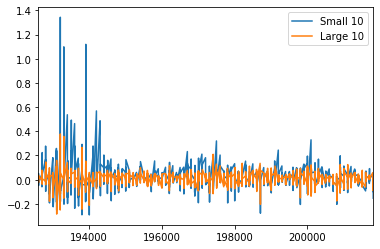

In [32]:
data.plot.line()
plt.show()

### Converting Index to date time object

In [33]:
data.index = pd.to_datetime(data.index, format="%Y%m")
data.head()

,Small 10,Large 10
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


### Converting Datetime object to Period to Month

In [34]:
data.index = data.index.to_period("M")
data.head()

,Small 10,Large 10
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


### Compute Drawdown

1. Compute A wealth Index
2. Compute previous peaks
3. Compute Drawdown

In [7]:
start_value = 1000
wealth_index = start_value*(1+data["Large 10"]).cumprod()  ##cumprod is to find cumulative product over a period of time
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: Large 10, dtype: float64

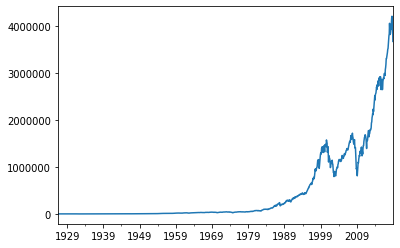

In [9]:
wealth_index.plot.line()
plt.show()

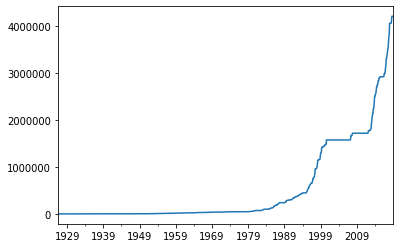

In [12]:
peaks = wealth_index.cummax()   ## to find the peaks even if actual time series goes down
peaks.plot()
plt.show()

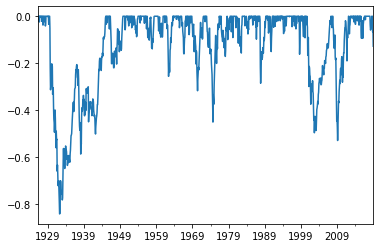

In [14]:
drawdown = (wealth_index-peaks)/peaks
drawdown.plot()
plt.show()

In [15]:
drawdown.min()

-0.8400375277943123

In [16]:
drawdown.idxmin()   ## for Finding the exact time when market faces biggest Chrunch in the entire time period 

Period('1932-05', 'M')

In [17]:
##for Finding the exact time when market faces biggest Chrunch in the sliced(interested) time period 
drawdown["1985":].idxmin()   ##idxmin returns the id of the min value

Period('2009-02', 'M')

#### The above result says that on February 2 2009 Market faces the bigest crunch since 1985 till 2018

## Creating our Own Function for drawdown

In [63]:
def drawdown(path: str, pct_company: int, size="LargeCap"):
    """
        Function takes a series of wealth
        and Computes and returns a dataframe
        Dataframe Contains:-
        1.Wealth index
        2.Previous Peaks
        3.percentage Drawdowns
        
    """
    max_draw = pd.read_csv(path,
                           header = 0, 
                           index_col = 0, 
                           parse_dates=True, 
                           na_values = -99.99)
    
    columns = ["Lo "+f"{pct_company}","Hi "+f"{pct_company}"]
    data = max_draw[columns]
    data.columns = ["SmallCap","LargeCap"]
    data = data/100
    data.index = pd.to_datetime(data.index, format="%Y%m")
    data.index = data.index.to_period("M")
    
    wealth_index = 1000*(1+data[size]).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdowns": drawdowns
    })

In [64]:
df_large = drawdown("data/Portfolios_Formed_on_ME_monthly_EW.csv",20,"SmallCap")

In [65]:
df_large[["Wealth","Peaks"]].head()

,Wealth,Peaks
1926-07,994.300000,994.30000
1926-08,1032.481120,1032.48112
1926-09,1027.525211,1032.48112
1926-10,993.719631,1032.48112
1926-11,988.254173,1032.48112


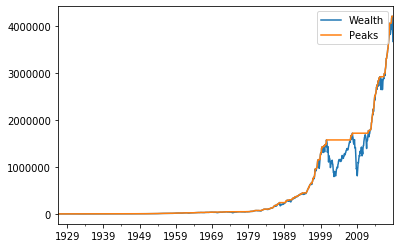

In [66]:
df[["Wealth","Peaks"]].plot()
plt.show()

#### Visualize Peaks And Wealth Yearwise

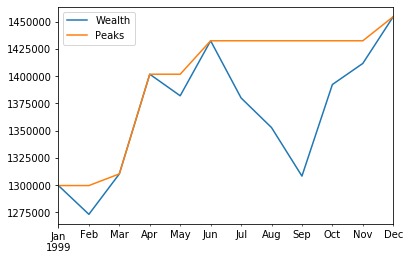

In [55]:
##For 1999
df[["Wealth","Peaks"]]["1999"].plot()
plt.show()

In [67]:
def plot_year(path: str, pct_company:int, start: int, end: int, size="LargeCap"):
    dataframe = drawdown(path, pct_company, size = size)
    diff = end - start
    if diff%2 == 0:
        nrow = diff//2
    else:
        nrow = diff//2 + 1
    
    fig, axes = plt.subplots(nrows=nrow, ncols=2)
    fig.set_figheight(diff*2)
    fig.set_figwidth(15)
    for i in range(nrow):
        for j in range(2):
            dataframe[["Wealth","Peaks"]][f"{start}"].plot(ax=axes[i,j])
            start = start+1
                
    plt.show()

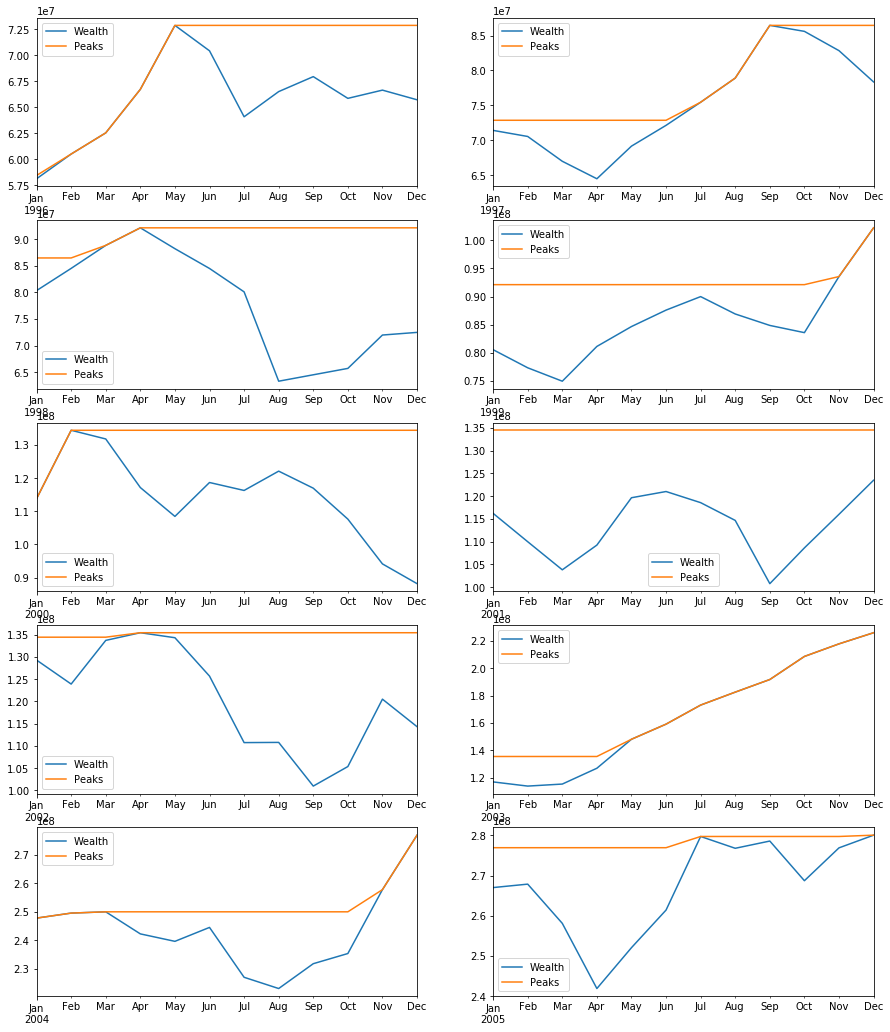

In [68]:
plot_year("data/Portfolios_Formed_on_ME_monthly_EW.csv",20,1996,2005,"SmallCap")